In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
from scipy import stats
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import accuracy_score,precision_score,\
                            recall_score,f1_score,\
                            classification_report,roc_auc_score,\
                            roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
visadf=pd.read_csv("Visadataset.csv")
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [5]:
visadf.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [6]:
visadf.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
visadf.dtypes.value_counts()

object     9
int64      2
float64    1
Name: count, dtype: int64

In [8]:
visadf.shape

(25480, 12)

In [31]:
visadf.select_dtypes(include="object").nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
region_of_employment         5
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [32]:
visadf.drop(columns='case_id',inplace=True)
visadf.shape

(25480, 11)

In [11]:
visadf.select_dtypes(include="object").nunique()

continent                6
education_of_employee    4
has_job_experience       2
requires_job_training    2
region_of_employment     5
unit_of_wage             4
full_time_position       2
case_status              2
dtype: int64

In [12]:
category_vars = visadf.select_dtypes(include='object').columns.tolist()
len(category_vars)


8

In [26]:
check_missing = visadf.isnull().sum() * 100 / visadf.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [33]:
    visadf['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

In [34]:
for col in visadf.select_dtypes(include=['object']).columns:
    print(f"{col}: {visadf[col].unique()}")

continent: ['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
education_of_employee: ['High School' "Master's" "Bachelor's" 'Doctorate']
has_job_experience: ['N' 'Y']
requires_job_training: ['N' 'Y']
region_of_employment: ['West' 'Northeast' 'South' 'Midwest' 'Island']
unit_of_wage: ['Hour' 'Year' 'Week' 'Month']
full_time_position: ['Y' 'N']
case_status: ['Denied' 'Certified']


In [35]:
for col in visadf.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(visadf[col].unique())
    visadf[col] = label_encoder.transform(visadf[col])
    print(f"{col}: {visadf[col].unique()}")

continent: [1 0 3 2 5 4]
education_of_employee: [2 3 0 1]
has_job_experience: [0 1]
requires_job_training: [0 1]
region_of_employment: [4 2 3 1 0]
unit_of_wage: [0 3 2 1]
full_time_position: [1 0]
case_status: [1 0]


In [36]:
visadf

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,1,3,1,1,1918,1887,4,86154.7700,3,1,0


<Axes: >

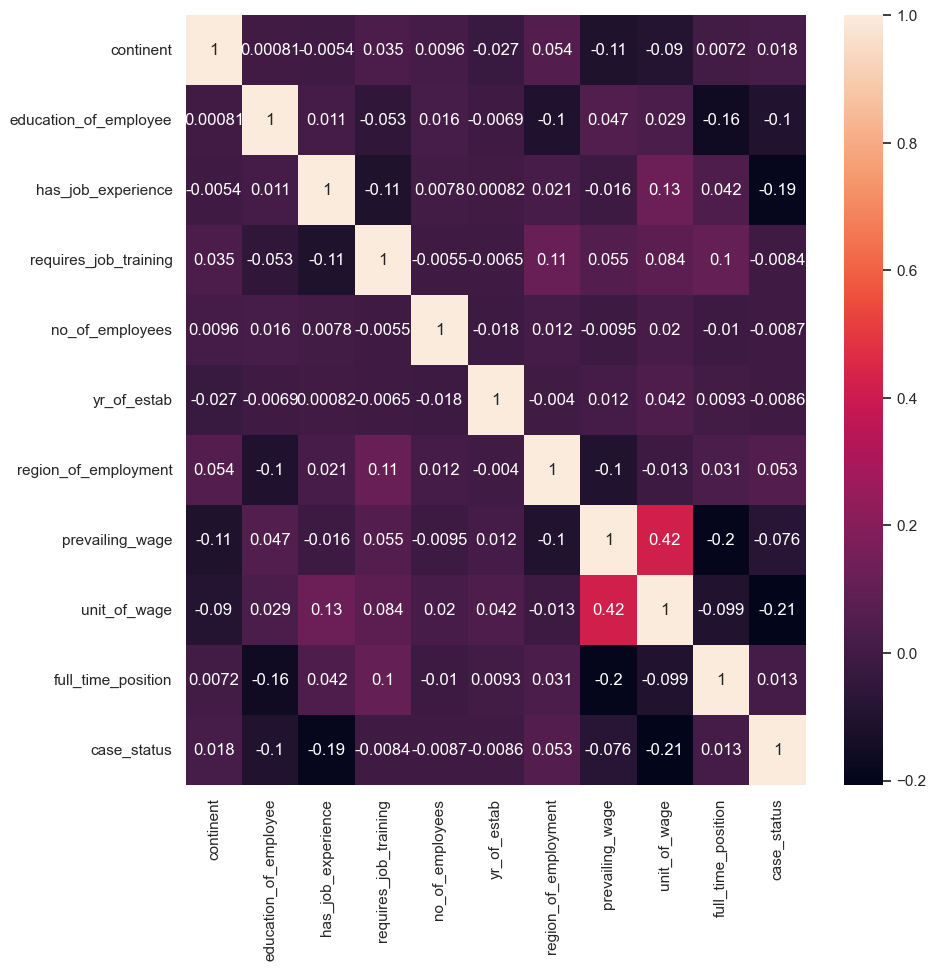

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(visadf.corr(), fmt='.2g', annot=True)

In [38]:
visadf.to_csv("Preprocessed_visadata.csv",index=False)

In [39]:
Preprocessed_visadf=pd.read_csv("Preprocessed_visadata.csv")
Preprocessed_visadf

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25475,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,1,3,1,1,1918,1887,4,86154.7700,3,1,0


In [40]:
Preprocessed_visadf.select_dtypes(include="object").nunique()

Series([], dtype: float64)

In [41]:
X = Preprocessed_visadf.drop('case_status', axis=1)
y = Preprocessed_visadf['case_status']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(20384, 10)
(5096, 10)
(20384,)
(5096,)


In [43]:
X_train

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
22574,1,3,1,0,172,2005,0,99474.93,3,1
7126,3,3,1,0,3421,1919,2,147083.79,3,1
14465,2,2,0,0,1884,2000,4,70848.78,3,1
7582,1,3,0,1,20571,2007,2,141869.75,3,1
1310,1,1,0,0,3072,2006,2,60225.00,3,1
...,...,...,...,...,...,...,...,...,...,...
13123,3,2,1,0,2096,1856,1,42419.85,3,1
19648,2,2,1,0,18190,1986,1,70954.28,3,1
9845,1,2,1,0,864,1954,3,95377.75,3,1
10799,2,3,1,0,220,1984,2,105082.98,3,1


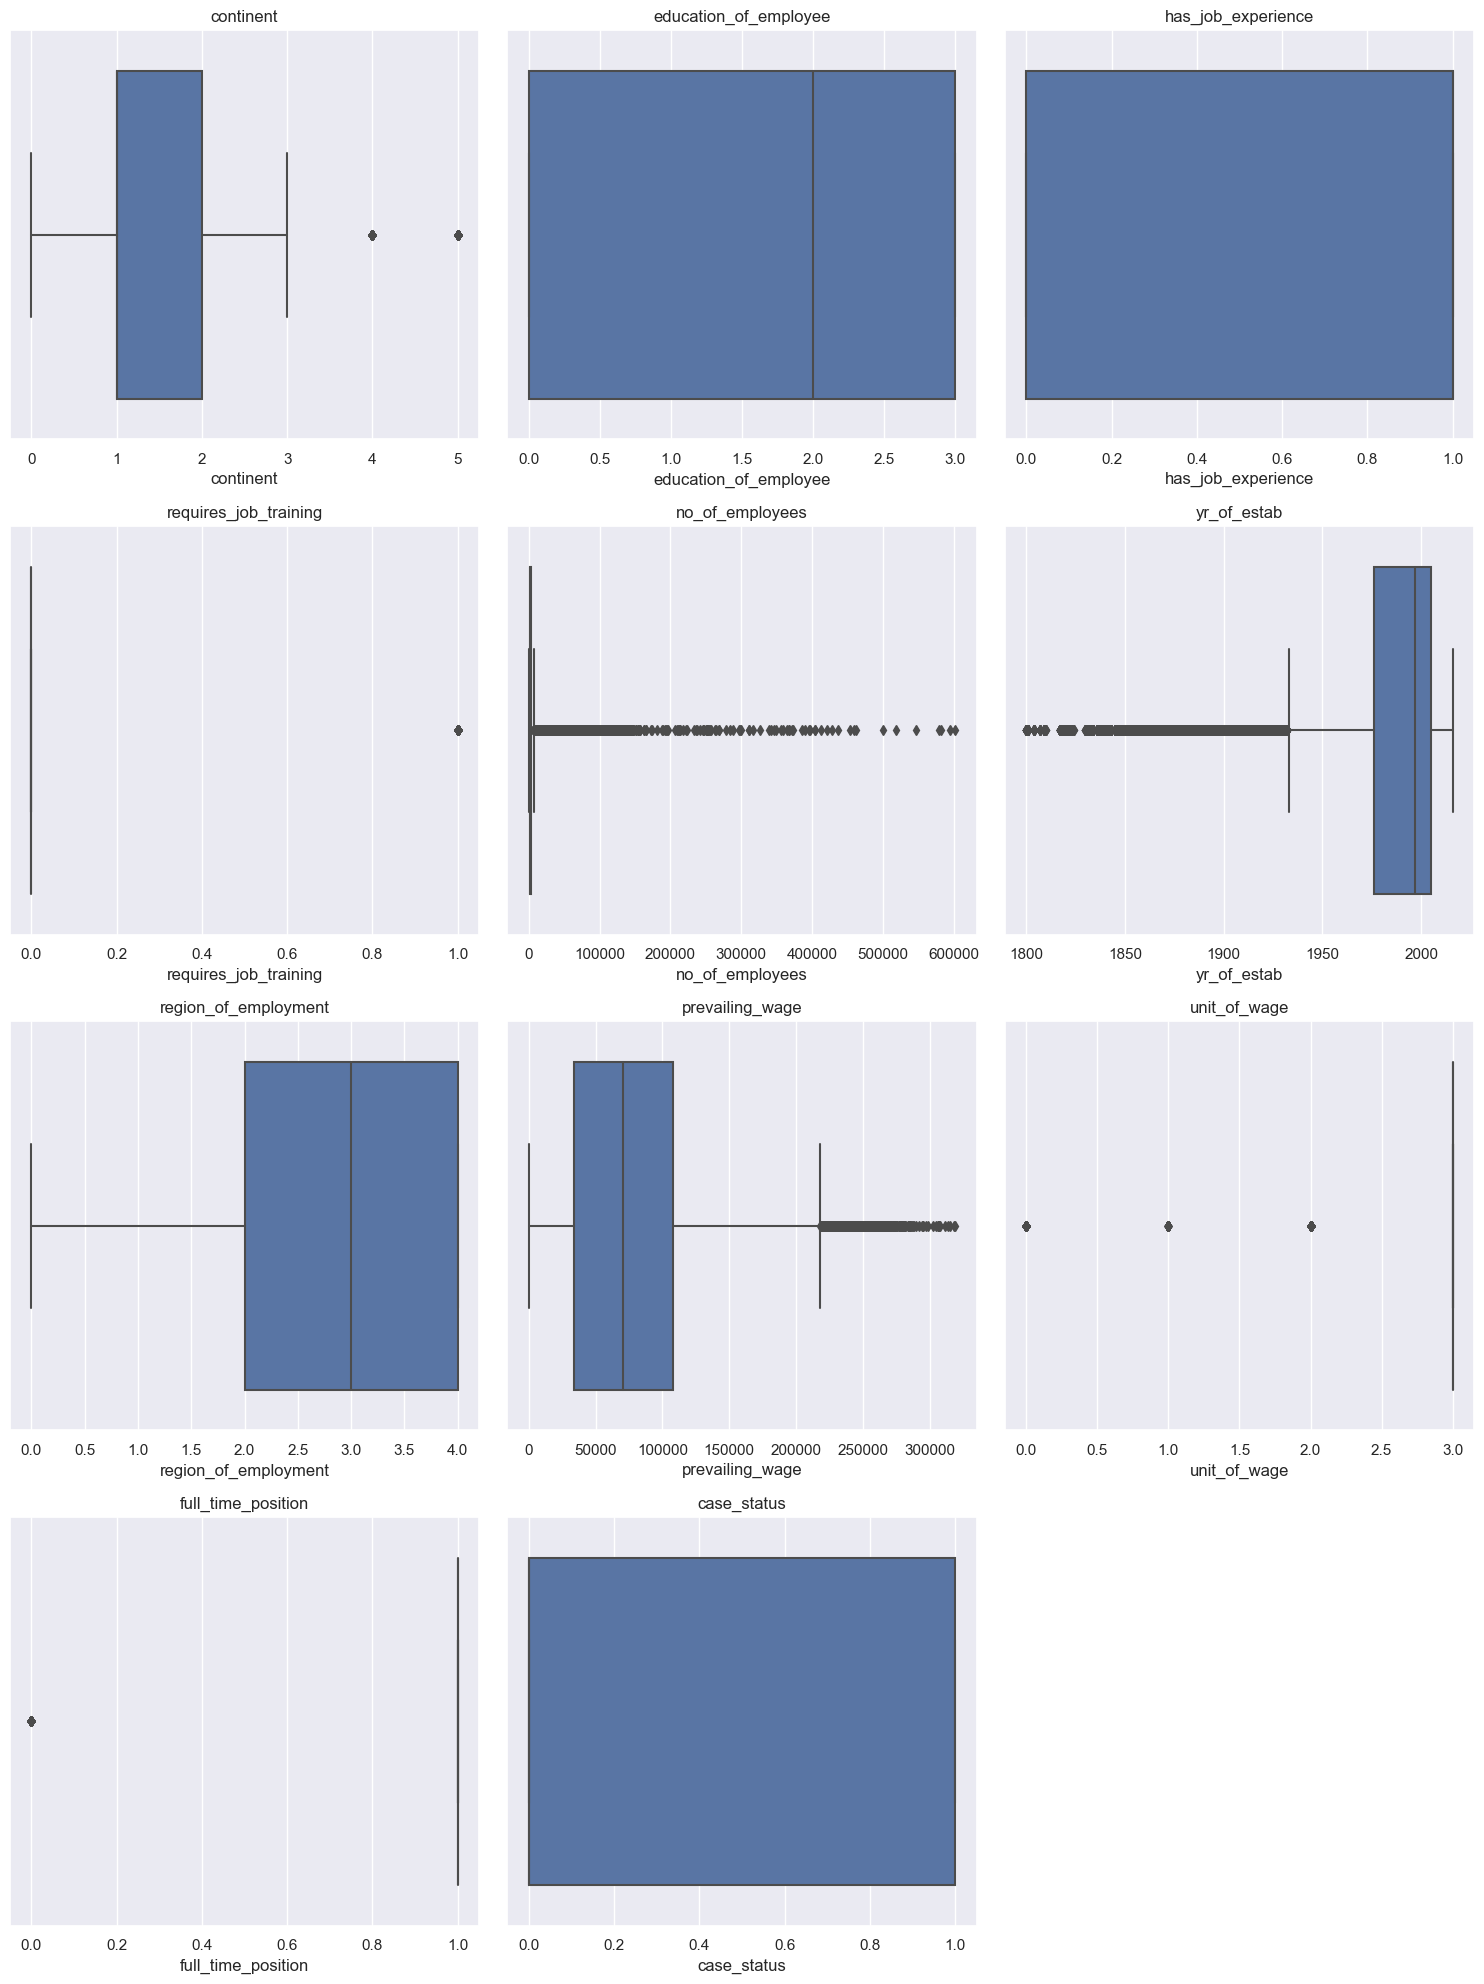

In [44]:
# Get the names of all columns with data type 'int' or 'float'
num_vars = Preprocessed_visadf.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=Preprocessed_visadf[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [45]:
print(X_train.shape),
print(y_train.shape)

(20384, 10)
(20384,)


In [46]:
from scipy import stats
selected_columns = ['continent','requires_job_training', 'no_of_employees', 'yr_of_estab',
                    'prevailing_wage', 'unit_of_wage','full_time_position']
z_scores = np.abs(stats.zscore(X_train[selected_columns]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [47]:
print(X_train.shape),
print(y_train.shape)

(17107, 10)
(17107,)


## With Hyperparameter Tuning

### Decision Tree Classifier

- Base Model devlopement  :  DecisionTreeClassifier()

- Parameter dictonary     : set basic parameters 
 
- Grid search             : GridSearchCV()

- Model devlopement       :  X_train, Y_train

- Find best parameters    : best_params_

- Again Model devlopement :  X_train, Y_train

- Predictions on          :  X_test

- Metrics                 :  y_Predictions and Y_test

#### Decision Tree: Hyper parameter tuning

In [48]:
dtree=DecisionTreeClassifier()

param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [50]:
grid_search = GridSearchCV(dtree,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [51]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [53]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 0}

In [57]:
best_score=grid_search.best_score_
print("best train accuracy:",best_score)

best train accuracy: 0.7461271710074144


In [55]:
val_score=cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                scoring='accuracy')

val_score

array([0.74663939, 0.74810053, 0.74422683, 0.7433499 , 0.7483192 ])

In [56]:
val_score.mean()

0.7461271710074144

#### Developing Decision Tree Model with best parameters:

In [58]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=3,min_samples_split=2,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [60]:
X_test.shape

(5096, 10)

In [61]:
y_pred_dt=dtree.predict(X_test)

In [62]:
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)

print("Accuracy is  : {}".format(acc_dt))
print("Precision is : {}".format(precision_dt))
print("Recall is    : {}".format(recall_dt))
print("F1 is        : {}".format(f1_dt))

Accuracy is  : 70.39
Precision is : 0.63
Recall is    : 0.29
F1 is        : 0.4


In [63]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80      3384
           1       0.63      0.29      0.40      1712

    accuracy                           0.70      5096
   macro avg       0.67      0.60      0.60      5096
weighted avg       0.69      0.70      0.67      5096



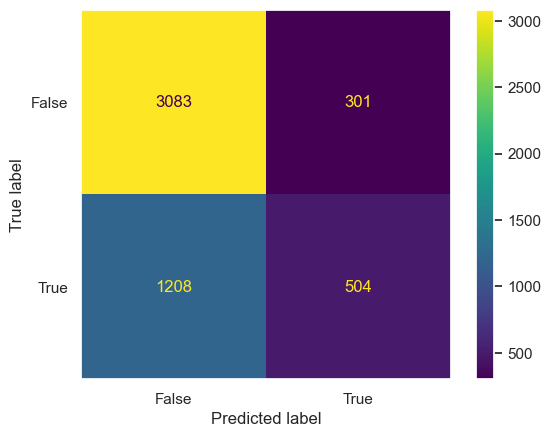

In [64]:
cmt=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 3083
False Postive  : 301
False Negative : 1208
True Postive   : 504


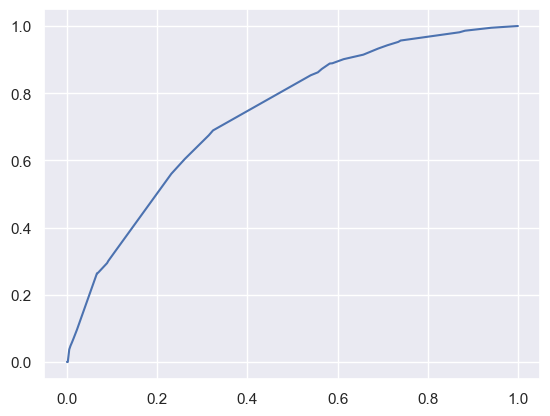

In [66]:
from sklearn.metrics import roc_curve
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob) 
plt.plot(fpr,tpr)

**Important features**

In [59]:
imp_df = pd.DataFrame({"Feature Name": X_train.columns,"Importance": dtree.feature_importances_})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
1,education_of_employee,0.600377
2,has_job_experience,0.231826
6,region_of_employment,0.064259
0,continent,0.059503
9,full_time_position,0.028801
5,yr_of_estab,0.006699
7,prevailing_wage,0.005095
4,no_of_employees,0.003441
3,requires_job_training,0.000000
8,unit_of_wage,0.000000


#### Logistic Regression: Hyper parameter tuning

In [93]:
logtree=LogisticRegression()

param_grid = {
 'penalty': ['l1','l2'],
 'random_state': [0,42],
 'solver': ['lbfgs','sag','liblinear']}

In [94]:
grid_search = GridSearchCV(logtree,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'], 'random_state': [0, 42],
                         'solver': ['lbfgs', 'sag', 'liblinear']},
             scoring='accuracy', verbose=True)

In [95]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'], 'random_state': [0, 42],
                         'solver': ['lbfgs', 'sag', 'liblinear']},
             scoring='accuracy', verbose=True)

In [98]:
grid_search.best_params_

{'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}

In [97]:
best_score=grid_search.best_score_
print("best train accuracy:",best_score)

best train accuracy: 0.7009996530180848


#### Developing Logistic Regression Model with best parameters:

In [105]:
logtree=LogisticRegression(penalty='l1',random_state=0,solver='liblinear')
logtree.get_params()
logtree.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [106]:
y_pred_log=logtree.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

print("Accuracy is  : {}".format(acc_log))
print("Precision is : {}".format(precision_log))
print("Recall is    : {}".format(recall_log))
print("F1 is        : {}".format(f1_log))

Accuracy is  : 67.29
Precision is : 0.64
Recall is    : 0.06
F1 is        : 0.11


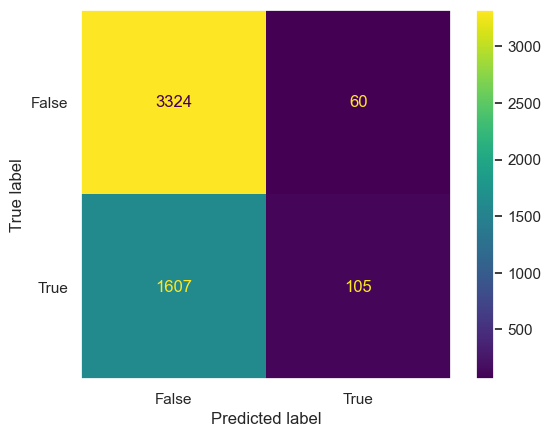

In [108]:
cmt=confusion_matrix(y_test,y_pred_log)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 3324
False Postive  : 60
False Negative : 1607
True Postive   : 105


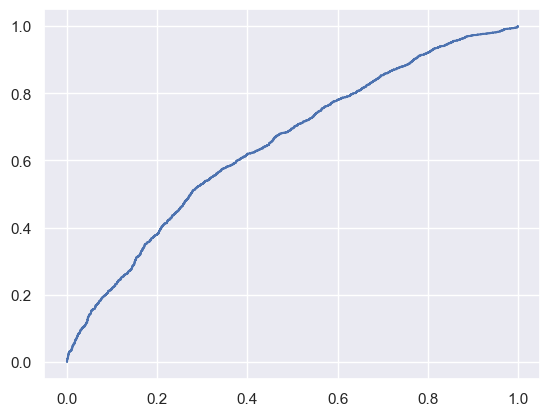

In [110]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### KNN: Hyper parameter tuning

In [67]:
KNNtree=KNeighborsClassifier()
param_grid = {"n_neighbors":[5,6,7,10],
              "leaf_size":[20,30,40,50],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']}


In [68]:
grid_search = GridSearchCV(KNNtree,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [5, 6, 7, 10]},
             scoring='accuracy', verbose=True)

In [69]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", li

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [5, 6, 7, 10]},
             scoring='accuracy', verbose=True)

In [70]:
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10}

In [71]:
best_score=grid_search.best_score_
print("best train accuracy:",best_score)

best train accuracy: 0.6836383078284827


#### Developing KNN Model with best parameters:

In [72]:
KNNtree=KNeighborsClassifier(algorithm='auto',leaf_size=20,n_neighbors=10)
KNNtree.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=10)

In [73]:
y_pred_KNN=KNNtree.predict(X_test)

In [74]:
acc_KNN= round(accuracy_score(y_test,y_pred_KNN)*100,2)
f1_KNN=round(f1_score(y_test,y_pred_KNN),2)
precision_KNN=round(precision_score(y_test,y_pred_KNN),2)
recall_KNN=round(recall_score(y_test,y_pred_KNN),2)

print("Accuracy is  : {}".format(acc_KNN))
print("Precision is : {}".format(precision_KNN))
print("Recall is    : {}".format(recall_KNN))
print("F1 is        : {}".format(f1_KNN))


Accuracy is  : 64.95
Precision is : 0.36
Recall is    : 0.05
F1 is        : 0.09


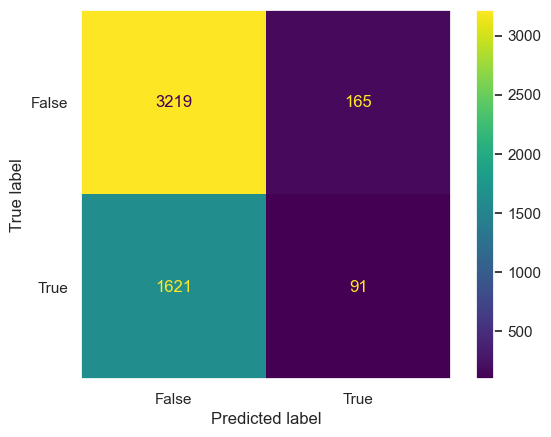

In [75]:
cmt=confusion_matrix(y_test,y_pred_KNN)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [76]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_KNN).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 3219
False Postive  : 165
False Negative : 1621
True Postive   : 91


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


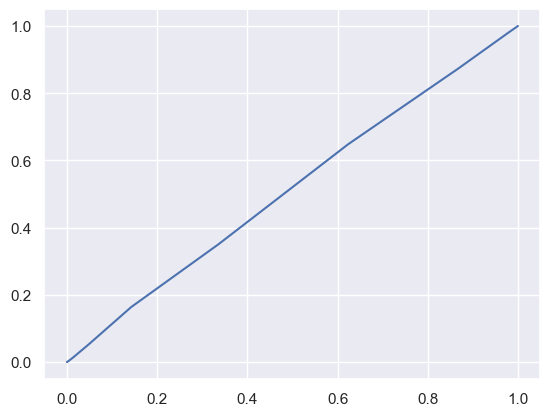

In [79]:
y_KNN_pred_prob=KNNtree.predict_proba(X_test.values)[:,1] 
fpr,tpr,threshold=roc_curve(y_test,y_KNN_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Naive Bayes: Hyper parameter tuning

In [121]:
NBtree=GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [122]:
grid_search = GridSearchCV(NBtree,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=True)

In [123]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=True)

In [124]:
grid_search.best_params_

{'var_smoothing': 0.02310129700083159}

In [126]:
best_score=grid_search.best_score_
print("best train accuracy:",best_score)

best train accuracy: 0.6993628414316566


#### Developing Naive Bayes Model with best parameters:

In [139]:
NBtree=GaussianNB(var_smoothing=0.02310129700083159)
NBtree.fit(X_train, y_train)

GaussianNB(var_smoothing=0.02310129700083159)

In [140]:
y_pred_NB=NBtree.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_NB= round(accuracy_score(y_test,y_pred_NB)*100,2)
f1_NB=round(f1_score(y_test,y_pred_NB),2)
precision_NB=round(precision_score(y_test,y_pred_NB),2)
recall_NB=round(recall_score(y_test,y_pred_NB),2)

print("Accuracy is  : {}".format(acc_NB))
print("Precision is : {}".format(precision_NB))
print("Recall is    : {}".format(recall_NB))
print("F1 is        : {}".format(f1_NB))

Accuracy is  : 66.29
Precision is : 0.2
Recall is    : 0.0
F1 is        : 0.0


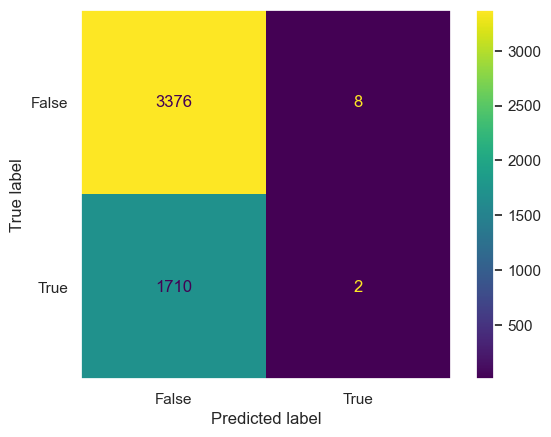

In [142]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_NB)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [143]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_NB).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 3376
False Postive  : 8
False Negative : 1710
True Postive   : 2


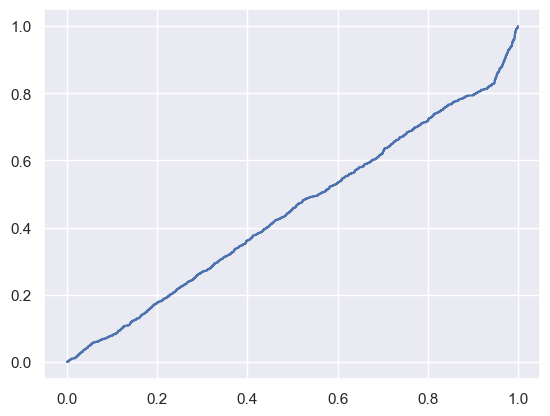

In [144]:
y_NB_pred_prob=NBtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_NB_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

#### Random Forest : Hyper parameter tuning

In [80]:
RFtree=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

In [81]:
grid_search = GridSearchCV(RFtree,param_grid,scoring='accuracy',cv=5,verbose=True)

In [82]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [83]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 0}

In [ ]:
best_score=grid_search.best_score_
print("best train accuracy:",best_score)

#### Developing  Random Forest Model with best parameters:

In [84]:
RFtree=RandomForestClassifier(criterion='entropy', max_depth=10,max_features='sqrt',n_estimators=200,random_state=0)
RFtree.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=0)

In [85]:
y_pred_RF=RFtree.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)

print("Accuracy is  : {}".format(acc_RF))
print("Precision is : {}".format(precision_RF))
print("Recall is    : {}".format(recall_RF))
print("F1 is        : {}".format(f1_RF))

Accuracy is  : 73.31
Precision is : 0.68
Recall is    : 0.38
F1 is        : 0.49


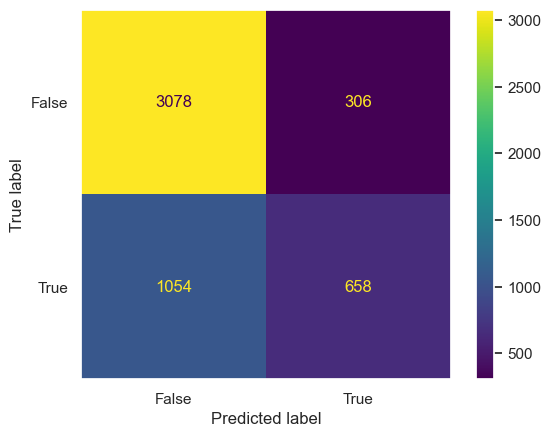

In [87]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()

In [88]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True Negative  :",tn)
print("False Postive  :",fp)
print("False Negative :",fn)
print("True Postive   :",tp)

True Negative  : 3078
False Postive  : 306
False Negative : 1054
True Postive   : 658


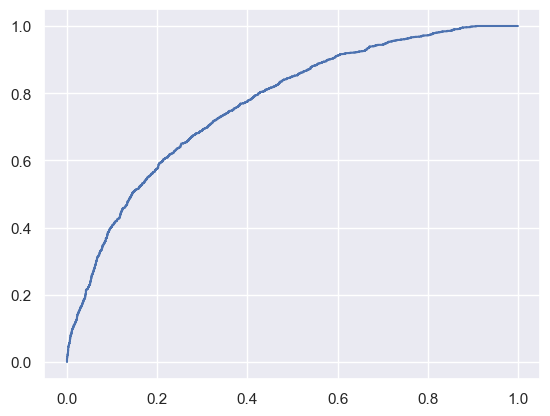

In [89]:
y_RF_pred_prob=RFtree.predict_proba(X_test)[:,1] 
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [145]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score
DT,70.39,0.63,0.29,0.40
KNN,64.95,0.36,0.05,0.09
Logistic,67.29,0.64,0.06,0.11
Naive Bayes,66.29,0.20,0.00,0.00
Random Forest,73.31,0.68,0.38,0.49
